rep: 0, Loss: 4.497335991364666, Precision: 0.10396039603960396
rep: 100, Loss: 0.13105588408308994, Precision: 0.8849009900990099
rep: 200, Loss: 0.0999653095856221, Precision: 0.9158415841584159
rep: 300, Loss: 0.08583834630425213, Precision: 0.9294554455445545
rep: 400, Loss: 0.07694122217179233, Precision: 0.9393564356435643
rep: 500, Loss: 0.07052973126556442, Precision: 0.9492574257425742
rep: 600, Loss: 0.06558045444861249, Precision: 0.9566831683168316
rep: 700, Loss: 0.06159797666311065, Precision: 0.9616336633663366
rep: 800, Loss: 0.058298798012143174, Precision: 0.9653465346534653
rep: 900, Loss: 0.055504279777483054, Precision: 0.9665841584158416
rep: 1000, Loss: 0.05309494615678608, Precision: 0.9665841584158416
rep: 1100, Loss: 0.05098736450228893, Precision: 0.9678217821782178
rep: 1200, Loss: 0.04912127129335787, Precision: 0.9727722772277227
rep: 1300, Loss: 0.04745198711806053, Precision: 0.9727722772277227
rep: 1400, Loss: 0.04594573065182208, Precision: 0.972772277

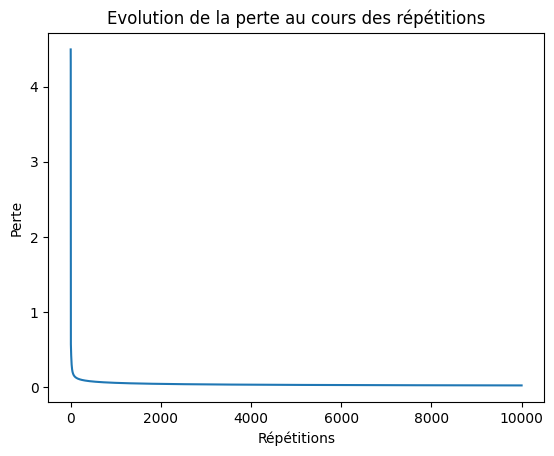

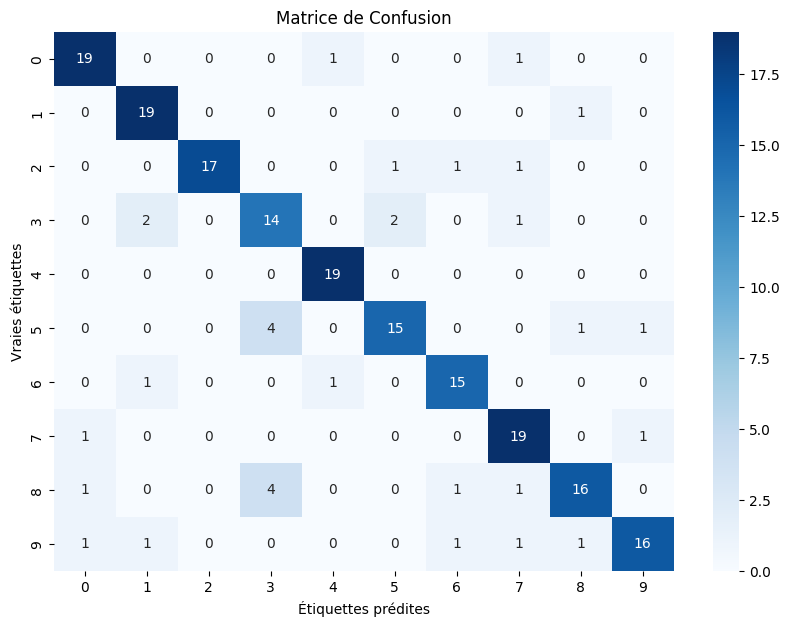

In [35]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

n = 100 #nombres d'entrées
k = 10 #nombres de sorties

X = np.random.rand(n, 1)  
Y = np.random.rand(k, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def Z(X, W, b):
    return np.dot(W, X) + b

def neurones(nombre_entrees, nombre_sorties):
    W = np.random.rand(nombre_sorties, nombre_entrees)
    B = np.random.rand(nombre_sorties, 1)
    return W, B


def apprentissage(X, Y, W, B, learning_rate, rep):
    loss_history = []
    precision_history = []
    for rep in range(rep):
        # Forward pass
        Z = np.dot(W, X) + B
        A = sigmoid(Z)
        
        # Compute the error
        dZ = A - Y
        loss = np.mean(0.5 * np.sum(dZ ** 2, axis=0))  # Quadratic cost function
        loss_history.append(loss)
        
        # Backward pass (Gradient Descent)
        dW = np.dot(dZ, X.T) / n
        dB = np.sum(dZ, axis=1, keepdims=True) / n
        
        # Update weights and biases
        W -= learning_rate * dW
        B -= learning_rate * dB
        
        if rep % 100 == 0:
            precision = calculer_precision(A, Y)
            precision_history.append(precision)
            print(f"rep: {rep}, Loss: {loss}, Precision: {precision}")

    return W, B, loss_history, precision_history

def calculer_precision(A, Y):
    predictions = np.argmax(A, axis=0)
    true_classes = np.argmax(Y, axis=0)
    precision = np.mean(predictions == true_classes)
    return precision

def charger_images(base_path, test_size=0.2):
    images = []
    labels = []
    
    for chiffre in range(10):  # Pour chaque chiffre de 0 à 9
        dossier_chiffre = os.path.join(base_path, str(chiffre))  # Chemin du dossier pour le chiffre
        for i in range(101):  # Pour chaque image de 0.jpg à 100.jpg
            image_path = os.path.join(dossier_chiffre, f"{i}.jpg")
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    img_array = np.asarray(img)
                    img_array = img_array / 255.0  # Normalisation
                    images.append(img_array.flatten())  # Aplatir l'image et ajouter au tableau
                    labels.append(chiffre)  # Ajouter l'étiquette correspondant au chiffre
    
    images = np.array(images)
    labels = np.array(labels)

    # Mélanger les données
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]
    
    # Diviser les données en ensembles d'entraînement et de test
    split_idx = int(images.shape[0] * (1 - test_size))
    X_train, X_test = images[:split_idx], images[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]
    
    return X_train, X_test, y_train, y_test


chemin_dataset = "C:/Users/cedri/Documents/Machine_learning/chiffres/10x10 dataset/"
X_train, X_test, y_train, y_test = charger_images(chemin_dataset, test_size=0.2)

# Convertir les étiquettes en vecteurs one-hot
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels].T

Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)
X_train = X_train
X_test = X_test

W, B = neurones(n, k)


learning_rate = 0.1  # Taux d'apprentissage
epochs = 10000
W, B, loss_history, precision_history = apprentissage(X_train.T, Y_train, W, B, learning_rate, epochs)

# Tracer l'évolution de la perte
plt.plot(loss_history)
plt.title('Evolution de la perte au cours des répétitions')
plt.xlabel('Répétitions')
plt.ylabel('Perte')
plt.show()


def plot_confusion_matrix(Y_true, Y_pred, classes):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Étiquettes prédites')
    plt.show()

Y_pred = np.argmax(sigmoid(Z(X_test.T, W, B)), axis=0)
Y_true = np.argmax(Y_test, axis=0)
classes = [str(i) for i in range(k)]
plot_confusion_matrix(Y_true, Y_pred, classes)






In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred, target_names=classes))

def evaluer_precision_par_classe(X_test, Y_test, W, B):
    A = sigmoid(Z(X_test, W, B))  # Calculez les prédictions pour X_test
    predictions = np.argmax(A, axis=0)
    true_classes = np.argmax(Y_test, axis=0)
    
    precision_par_classe = np.zeros(k)  # k est le nombre de sorties/classes, ici 10 pour les chiffres de 0 à 9
    
    for classe in range(k):
        classe_indices = np.where(true_classes == classe)[0]  # Trouvez les indices des vraies étiquettes de cette classe
        classe_predictions = predictions[classe_indices]
        classe_verites = true_classes[classe_indices]
        precision_par_classe[classe] = np.mean(classe_predictions == classe_verites)
    
    return precision_par_classe

precision_par_classe = evaluer_precision_par_classe(X_test.T, Y_test, W, B)

for i, precision in enumerate(precision_par_classe):
    print(f"Précision pour le chiffre {i}: {precision * 100:.2f}%")
    
    


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.86      0.93      0.89        27
           2       1.00      0.85      0.92        20
           3       0.60      0.60      0.60        15
           4       0.95      0.95      0.95        21
           5       0.74      0.88      0.80        16
           6       0.81      0.84      0.82        25
           7       0.92      0.80      0.86        15
           8       0.73      0.61      0.67        18
           9       0.81      0.89      0.85        19

    accuracy                           0.83       202
   macro avg       0.83      0.82      0.82       202
weighted avg       0.84      0.83      0.83       202

Précision pour le chiffre 0: 84.62%
Précision pour le chiffre 1: 92.59%
Précision pour le chiffre 2: 85.00%
Précision pour le chiffre 3: 60.00%
Précision pour le chiffre 4: 95.24%
Précision pour le chiffre 5: 87.50%
Précision pour le chiffre

In [ ]:
def calculer_precision(A, Y):
    predictions = np.argmax(A, axis=0)
    true_classes = np.argmax(Y, axis=0)
    precision = np.mean(predictions == true_classes)
    return precision
